In [2]:
# Ananlyzing csv table with the following colums: 

import pandas as pd

data = pd.read_csv('weight-height.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [3]:
print(data.isnull().sum())

Gender    0
Height    0
Weight    0
dtype: int64


In [4]:
data['height_cm'] = data['Height'] * 2.54

data['weight_kg'] = data['Weight'] * 0.453592

data['bmi'] = data['weight_kg'] / ((data['height_cm'] / 100) ** 2)

data.head()

,Gender,Height,Weight,height_cm,weight_kg,bmi
0,Male,73.847017,241.893563,187.571423,109.720985,31.185761
1,Male,68.781904,162.310473,174.706036,73.622732,24.121044
2,Male,74.110105,212.740856,188.239668,96.497550,27.232906
3,Male,71.730978,220.042470,182.196685,99.809504,30.067059
4,Male,69.881796,206.349801,177.499761,93.598619,29.708033


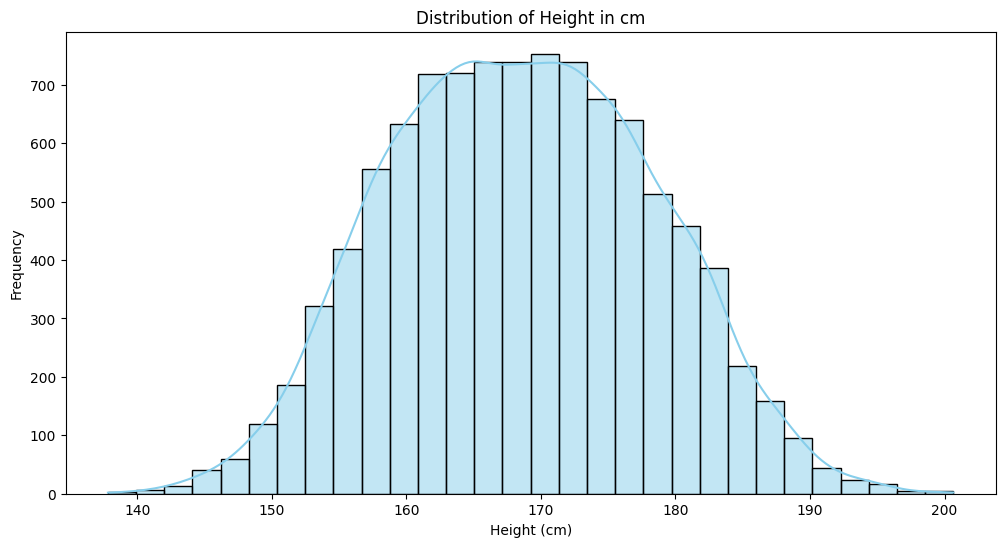

In [5]:
# Distribution of height

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(data['height_cm'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Height in cm')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

The distribution of height is approximately normal, indicating that the majority of individuals have heights around the central value. This suggests that the data is fairly evenly distributed across different height values, with a slight peak in the middle.

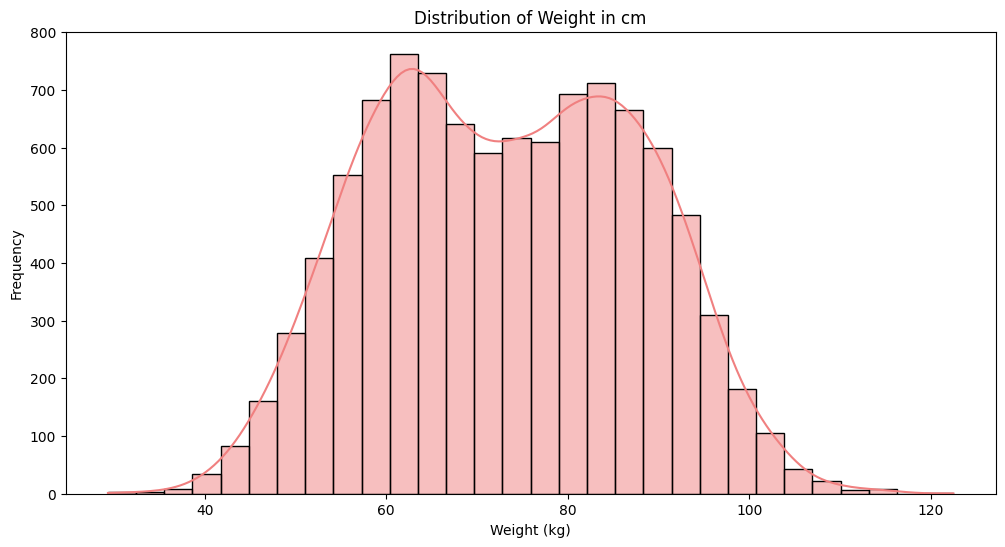

In [6]:
# Distribution of weight

plt.figure(figsize=(12,6))
sns.histplot(data['weight_kg'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Weight in cm')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

The distribution of weight appears to be right-left-skewed (more left), suggesting that there are some individuals with lower weights. 

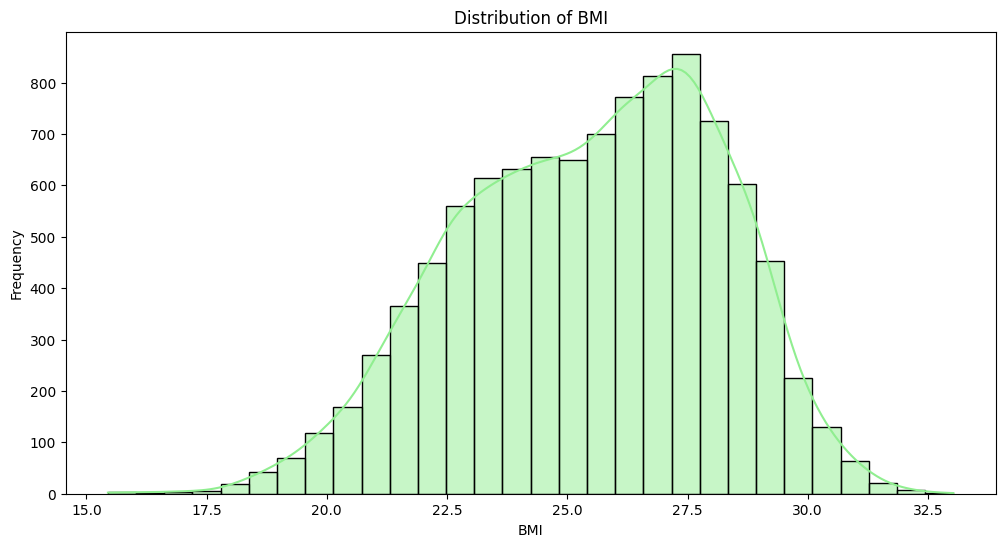

In [7]:
# Distribution of BMI

plt.figure(figsize=(12,6))
sns.histplot(data['bmi'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

The distribution of BMI (Body Mass Index) shows that majority of individuals fall within a certain BMI range, with a peak in the distribution. That provides insights into the overall body composition of the dataset. Peak of the plot is at around 27.5. Normal BMI range is from 18.5 to 24.9

In [8]:
data.describe()

,Height,Weight,height_cm,weight_kg,bmi
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,168.573602,73.228054,25.475457
std,3.847528,32.108439,9.772721,14.564131,2.693810
min,54.263133,64.700127,137.828359,29.347460,15.448750
25%,63.505620,135.818051,161.304276,61.605982,23.464807
50%,66.318070,161.212928,168.447898,73.124894,25.733316
75%,69.174262,187.169525,175.702625,84.898599,27.558535
max,78.998742,269.989699,200.656806,122.465167,33.028103


           height_cm  weight_kg       bmi
height_cm   1.000000   0.924756  0.669199
weight_kg   0.924756   1.000000  0.896438
bmi         0.669199   0.896438  1.000000


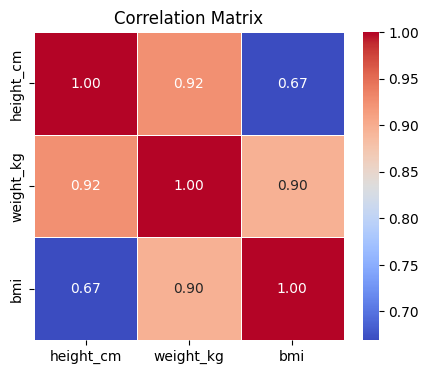

In [9]:
# Matrix correlation

correlation_matrix = data[['height_cm', 'weight_kg', 'bmi']].corr()

print(correlation_matrix)

# Heat map of correlations

plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



The correlation matrix represents the relationships between height, weight, and BMI. The values range from -1 to 1. As we can see, between weight and height is strong correlation (0.92). This shows us that when one variable (height) increases, the other (weight) tends to increase too.

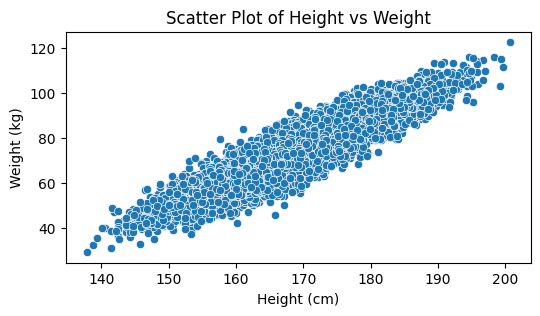

In [10]:
# Scatter plot
plt.figure(figsize=(6,3))
sns.scatterplot(x='height_cm', y='weight_kg', data=data)
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

The scatter plot illustrates the relationship between height and weight. There is a positive correlation, indicating that, on average, taller individuals tend to have higher weights. However, the spread of points suggests variability in weight within similar height ranges.

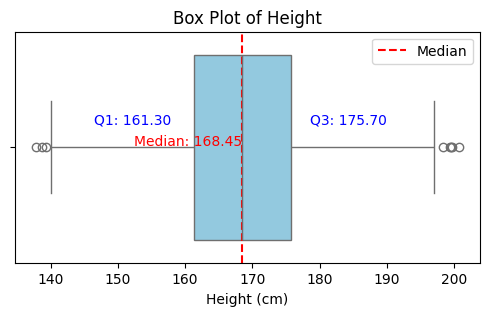

In [11]:
# Box plot

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['height_cm'], color='skyblue')
plt.title('Box Plot of Height')
plt.xlabel('Height (cm)')
median_value = data['height_cm'].median()
q1_value = data['height_cm'].quantile(0.25)
q3_value = data['height_cm'].quantile(0.75)
plt.axvline(x=median_value, color='red', linestyle='--', label='Median')

plt.text(median_value, -0.01, f'Median: {median_value:.2f}', color='red', ha='right')
plt.text(158, -0.10, f'Q1: {q1_value:.2f}', color='blue', ha='right')
plt.text(190, -0.10, f'Q3: {q3_value:.2f}', color='blue', ha='right')

plt.legend()

plt.show()



The box plot provides a visual representation of the distribution of height, including the median, quartiles, and potential outliers. The median is highlighted with a red dashed line, and the box represents the interquartile range (IQR). The plot gives an overview of the central tendency and spread of height values. 

In [14]:
# Creating model and learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data[['height_cm']]
y = data['weight_kg']

# Correct variable name to x instead of X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Convert x_train to a NumPy array
X_train_array = X_train.values.reshape(-1, 1)

model.fit(X_train_array, y_train)

# Convert x_test to a NumPy array
X_test_array = X_test.values.reshape(-1, 1)

y_pred = model.predict(X_test_array)

result_df = pd.DataFrame({'Actual Weight': y_test, 'Predicted Weight': y_pred})

# Display the first few rows of the DataFrame
print(result_df.head())

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Testing this model with random value 
new_height = [[170]]

# Convert new_height to a NumPy array
new_height_array = np.array(new_height).reshape(-1, 1)

predicted_weight = model.predict(new_height_array)
print(f'Predicted weight: {predicted_weight}')


      Actual Weight  Predicted Weight
6252      78.523948         81.308176
4684      88.523941         81.804629
1731      77.209274         73.310849
4742      97.544805         92.634966
4521      82.880989         75.563466
Mean Squared Error (MSE): 30.66
R-squared (R2): 0.86
Predicted weight: [75.1659962]


According to the model, for an individual with a height of 170 cm, the predicted weight is approximately 75.17 kg. This is the model's estimation based on the learned relationship between height and weight from the training data.